# Task : Build a recurrent neural network (LSTM) to classify MNIST digits dataset, using TensorFlow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

###Loading the dataset and normalizing the images along with One-Hot Encoding of the target variables

In [ ]:
#Loading the mnist dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#Normalization
X_test,X_train=X_test/255.0,X_train/255.0

# one hot encode target values
# we know that there are 10 classes and that classes are represented as unique integers
# We can, therefore, use a one hot encoding for the class element of each sample,
# transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes.
# We can achieve this with the to_categorical() utility function.
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 1s 0us/step


##Printing the shapes
It is interesting to note the difference between shapes of ```y_train``` and ```Y_train```

```y_train.shape=(60000,)``` i.e. a scalar

```Y_train.shape=(60000,10)```i.e a vector after transforming into a 10 element binary vector

In [ ]:
print(y_train.shape)
print(Y_train.shape)
print(y_test.shape)
print(Y_test.shape)
print(X_test.shape)
print(X_train.shape)

(60000,)
(60000, 10)
(10000,)
(10000, 10)
(10000, 28, 28)
(60000, 28, 28)


##Visualizing the MNIST dataset

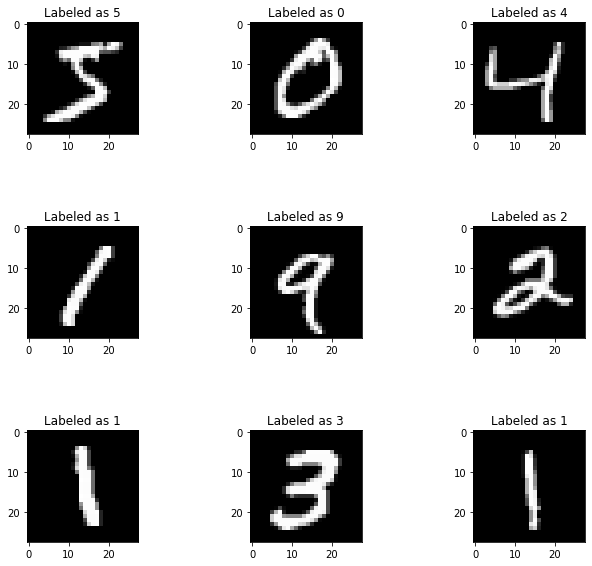

In [ ]:
# plotting first few images
plt.figure(figsize=(10,10))
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
  # labels
	plt.title('Labeled as {label}'.format(label=y_train[i]))
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# adjusting the spacing
plt.subplots_adjust(wspace=1, hspace=0.5)
# show the figure
plt.show()

###We will be using LSTM(Long Short Term Memory) along with Keras Sequential model

In [ ]:
model=Sequential()
model.add(LSTM(64,input_shape=(28,28))) # image rows=28 and image columns=28 i.e. 28*28 pixels and 64 is the number of units in the hidden layer on which we want to apply LSTM
model.add(Dense(10,activation="softmax")) # Since we will have an output between 0-9 and mnist is meant to be classified into 10 classes
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


##Compiling and training the model

In [ ]:
#We are using categorical_crossentropy because it produces one-hot array containing the probable match for each category and here we have Y_test and Y_train as one hot encoded array
model.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["acc"])
history = model.fit(X_train, Y_train, epochs=50,validation_data = (X_test, Y_test))# Using epochs=50

Epoch 1/50
1875/1875 [==============================] - 17s 5ms/step - loss: 0.4203 - acc: 0.8666 - val_loss: 0.1585 - val_acc: 0.9530
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1370 - acc: 0.9591 - val_loss: 0.1252 - val_acc: 0.9618
Epoch 3/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0951 - acc: 0.9718 - val_loss: 0.0827 - val_acc: 0.9752
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0737 - acc: 0.9778 - val_loss: 0.0849 - val_acc: 0.9722
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0613 - acc: 0.9815 - val_loss: 0.0839 - val_acc: 0.9728
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0523 - acc: 0.9844 - val_loss: 0.0571 - val_acc: 0.9822
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0456 - acc: 0.9862 - val_loss: 0.0522 - val_acc: 0.9835
Epoch 8/50
1875/1875 [==============================] - 8s 4m

##Determining the loss and accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0537 - acc: 0.9877
Loss: 0.053716279566287994 - Acc: 0.9876999855041504


##Plotting Loss

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


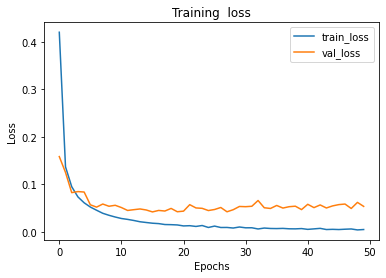

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

epochs = range(0,50) #since epochs=50
loss_train = history.history['loss']
val_loss= history.history['val_loss']

#Plotting Loss against Epochs
plt.plot(epochs,loss_train)
plt.plot(epochs,val_loss)
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

##Plotting Accuracy

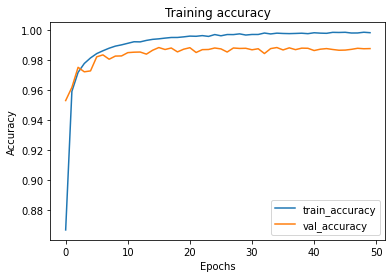

In [ ]:
accuracy = history.history['acc']

val_accuracy=history.history['val_acc']
#Plotting accuracy against Epochs
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,accuracy)
plt.plot(epochs,val_accuracy)
plt.legend(['train_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

#Prediction Validation Results

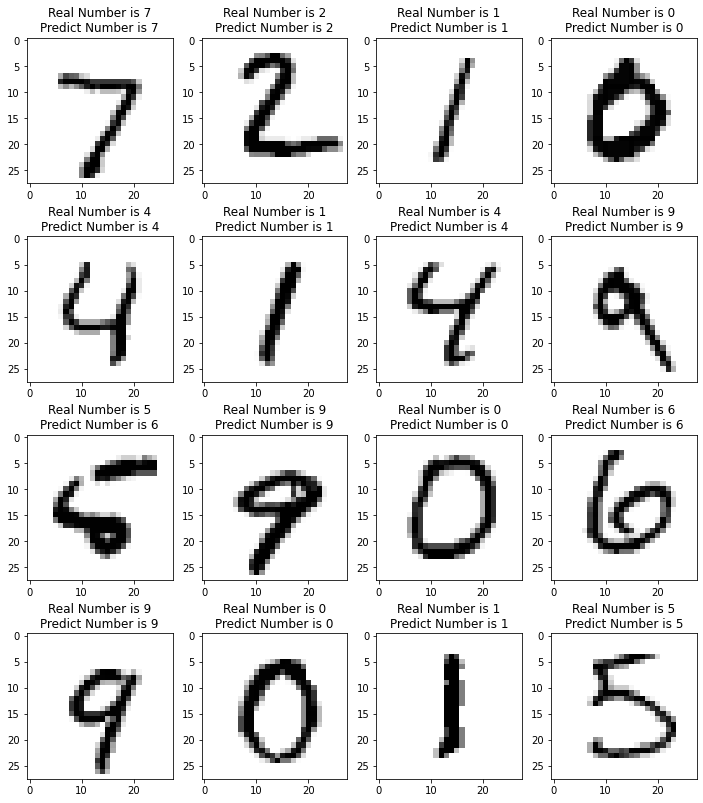

In [ ]:
y_pred = model.predict(X_test) # Prediction the model

fig, axis = plt.subplots(4, 4, figsize=(12, 14)) # plt.subplots returns a tuple containing a figure and axes objects
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");
